In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:

#with open("../ressources/automode_descriptions_evaluated.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed21_n600.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed15_n300_24-12-18.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed16_n300_24-12-17_targetlights.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed17_n600_24-12-20.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_s14s15s16_n300_24_12_20_target.pickle", "rb") as file:
with open("../ressources/automode_evaluated_concat_s14-s18_24-12-23.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_concat_s14s15s16_n300_24-12-18.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_concat_s14n600_s15n600_train_2024-12-12_16.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


/tmp/ipykernel_1500365/3181682175.py:3: RuntimeWarning: invalid value encountered in divide
  original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)


In [5]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=529 new_size=523: ratio: 0.9886578449905482
 Connection:  old_size=525 new_size=502: ratio: 0.9561904761904761
 Distribution:  old_size=495 new_size=451: ratio: 0.9111111111111111
 Foraging:  old_size=551 new_size=546: ratio: 0.9909255898366606


In [6]:
group_dfs["Aggregation"]

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,original_index,z-scores,coeff_of_var
0,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.615385, 0.615385, 0.384615, 0.538462, 0.538...",0.607693,Aggregation,0,"[0.06097178325839157, 0.06097178325839157, -1....",0.063325
1,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.625, 1.0, 0.375, 0.625, 0.75, 0.75, 0.625, ...",0.700000,Aggregation,3,"[-0.4999999999999997, 2.0000000000000004, -2.1...",0.072289
2,The arena has a radius of 4.44 m. The arena fe...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.363636, 0.363636, 0.363636, 0.0909091, 0.27...",0.272727,Aggregation,23,"[1.0000001100001041, 1.0000001100001041, 1.000...",0.066667
3,"With a length of 2.17 meters, width of 6.48 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,Aggregation,41,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000000
4,"A rectangular area, with a length of 5.42 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.722222, 0.777778, 0.777778, 0.777778, 0.888...",0.777778,Aggregation,43,"[-0.9128758586758304, 3.286338629613225e-06, 3...",0.024896
...,...,...,...,...,...,...,...,...,...,...,...
524,The environment is a circle made out of 16 wal...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.954545, 0.863636, 0.863636, 0.909091, 0.863...",0.863636,Aggregation,2079,"[1.9999977999784422, -2.2000021988229207e-06, ...",0.017241
525,"With a radius of 4.64 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.875, 0.9375, 1.0, 1.0, 1.0, 0.9375, 1.0, 0....",0.968750,Aggregation,2085,"[-2.23606797749979, -0.7453559924999299, 0.745...",0.014743
526,"The circular arena, constructed with 24 walls,...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.666667, 0.5, 0.555556, 0.555556, 0.611111, ...",0.538889,Aggregation,2090,"[1.4236667352913135, -0.4332903603808464, 0.18...",0.046558
527,"A rectangular area, with a length of 4.11 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,Aggregation,2093,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000000


In [7]:
try:
    print(group_dfs["Foraging"][group_dfs["Foraging"]["avg_score"] > 4000].iloc[0].behavior_tree)
except:
    print("not found")

not found


## Distribution of Scores

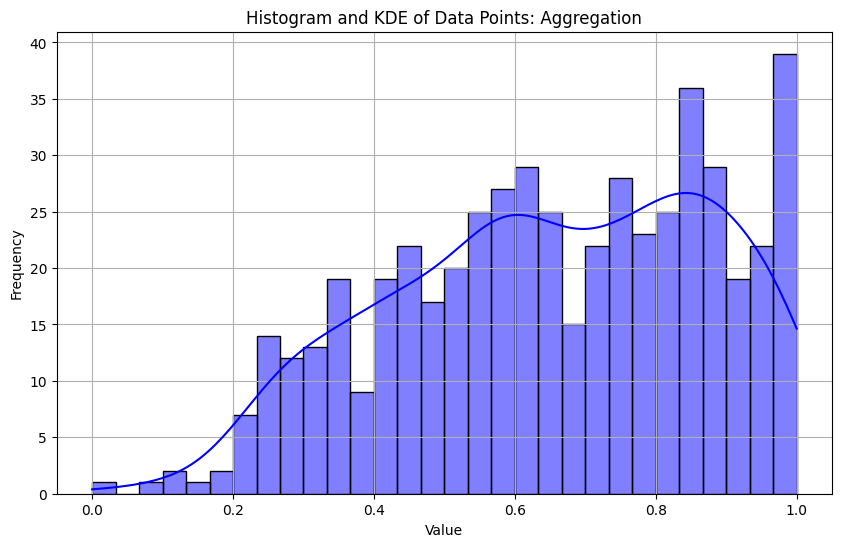

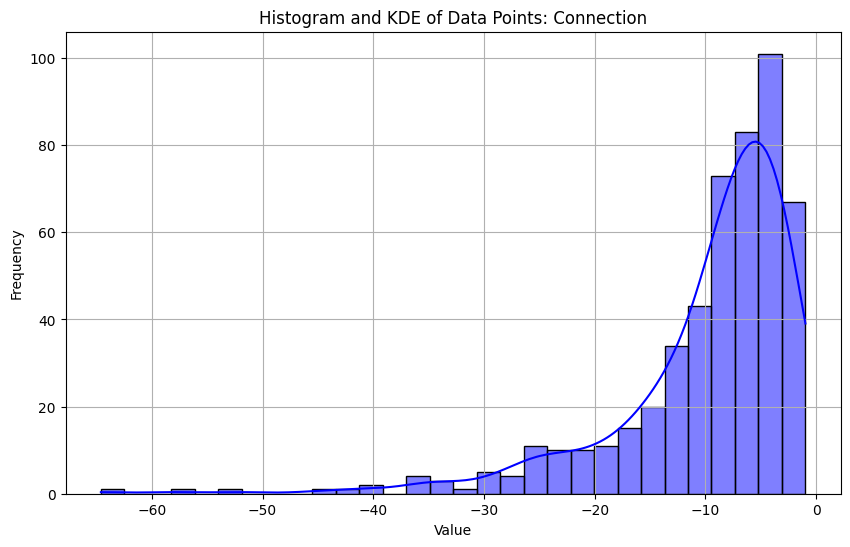

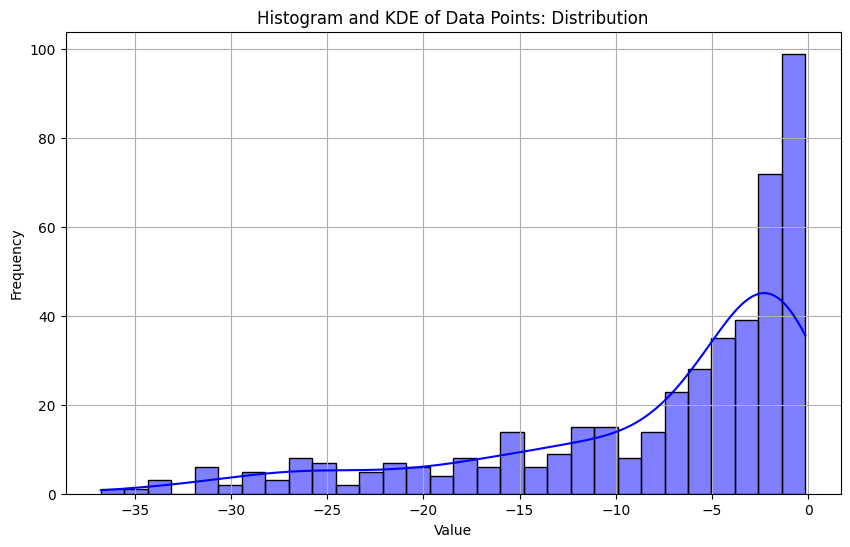

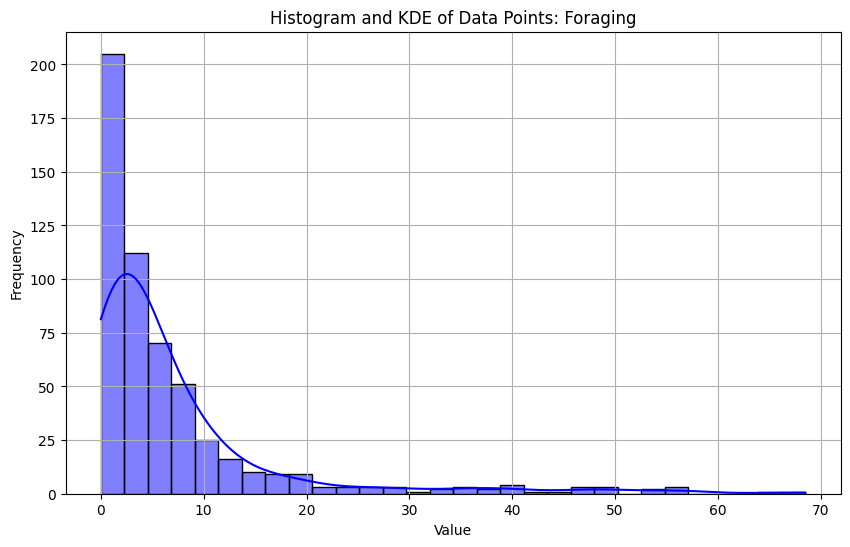

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for group, df in group_dfs.items():
    # Sample data
    data = df.avg_score.to_numpy()

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"Histogram and KDE of Data Points: {group}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [9]:
import plotly.express as px
import numpy as np

# Sample data
data = group_dfs["Aggregation"].avg_score.to_numpy()

# Create a KDE plot
# fig = px.density_contour(x=data, title='KDE Plot of Data Points', labels={'x': 'Value'})
# fig.update_layout(xaxis_title='Value', yaxis_title='Density')
# fig.show()

# Create a histogram
fig = px.histogram(data, nbins=30, title='Histogram of Data Points', labels={'value': 'Value'})
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')
fig.show()


## Coefficient of Variation Analysis

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



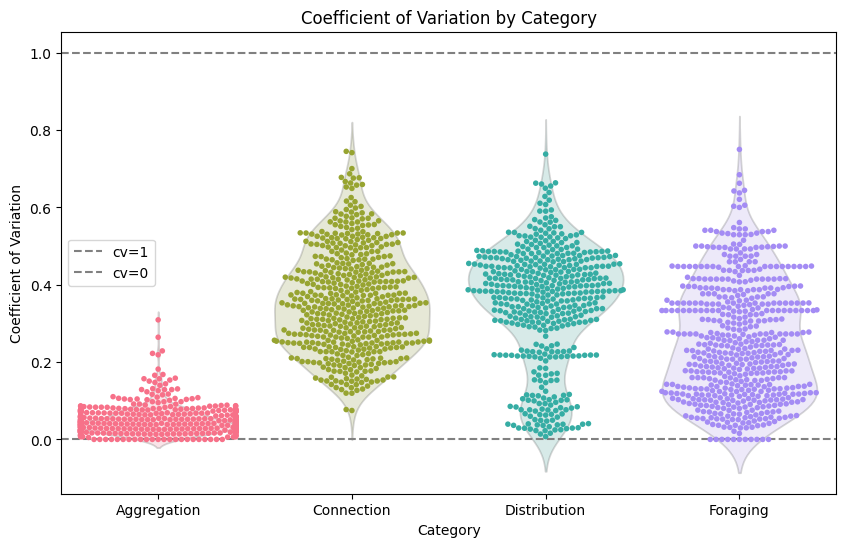

In [10]:
combined_df = pd.concat(
    [df.assign(category=category) for category, df in group_dfs.items()],
    ignore_index=True
)

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df, x='category', y='coeff_of_var', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df, x='category', y='coeff_of_var', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=0')

# Step 4: Customize the plot
plt.title('Coefficient of Variation by Category')
plt.xlabel('Category')
plt.ylabel('Coefficient of Variation')
plt.legend()  # Show legend for the horizontal line
plt.show()

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

13.1% 

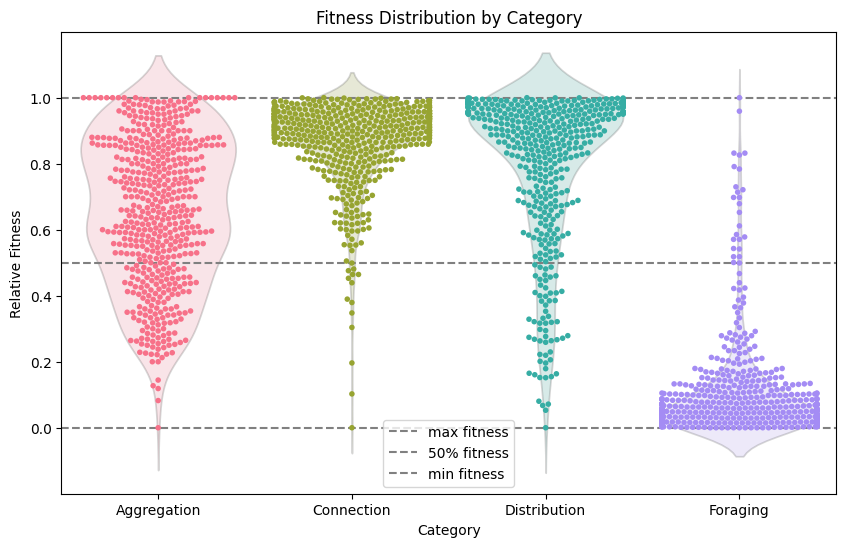

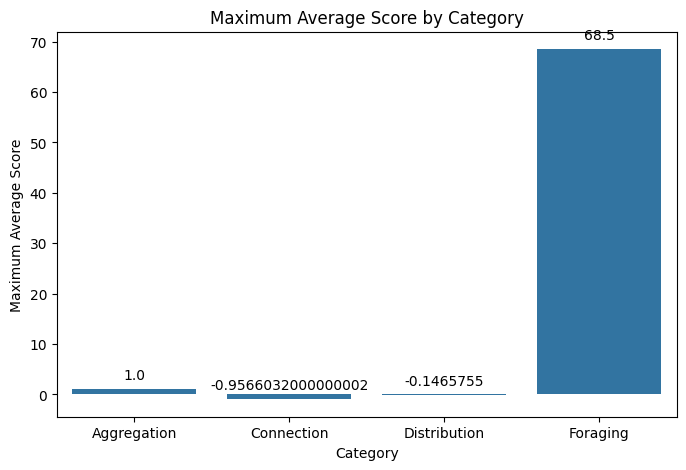

In [11]:
# Step 1: Calculate the max and min avg_score for each category
min_max_values = combined_df.groupby("category")["avg_score"].agg(['min', 'max']).reset_index()

# Step 2: Merge the min and max values back to the original DataFrame
combined_df_scaled = combined_df.merge(min_max_values, on="category")

# Step 3: Scale the avg_score to the range [0, 1]
combined_df_scaled['scaled_avg_score'] = (combined_df_scaled['avg_score'] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

# Step 4: Customize the plot
plt.title('Fitness Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Relative Fitness')
plt.legend()  # Show legend for the horizontal line
plt.show()

# Step 1: Calculate the maximum avg_score for each category
max_values = combined_df_scaled.groupby("category")["avg_score"].max().reset_index()
max_values.rename(columns={"avg_score": "max_avg_score"}, inplace=True)

# Step 2: Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

# Adding titles and labels
plt.title('Maximum Average Score by Category')
plt.xlabel('Category')
plt.ylabel('Maximum Average Score')

# Step 3: Annotate the bars with their respective values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset text
                      textcoords='offset points')

In [12]:
if "llm_avg_score" in combined_df.keys():
    scoreidx = "llm_avg_score"
    # Step 1: Calculate the max and min avg_score for each category
    min_max_values = combined_df.groupby("category")[scoreidx].agg(['min', 'max']).reset_index()

    # Step 2: Merge the min and max values back to the original DataFrame
    combined_df_scaled = combined_df.merge(min_max_values, on="category")

    # Step 3: Scale the avg_score to the range [0, 1]
    combined_df_scaled['scaled_avg_score'] = (combined_df_scaled[scoreidx] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

    plt.figure(figsize=(10, 6))

    # Define a color palette for the categories
    palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

    # Use violinplot to show the distribution of the data with colors
    sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

    # Overlay swarm plot to scatter individual points with colors
    sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

    # Add a horizontal line at y=1 (solid and black)
    plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
    plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
    plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

    # Step 4: Customize the plot
    plt.title('LLM Fitness Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Relative Fitness')
    plt.legend()  # Show legend for the horizontal line
    plt.show()

    # Step 1: Calculate the maximum avg_score for each category
    max_values = combined_df_scaled.groupby("category")[scoreidx].max().reset_index()
    max_values.rename(columns={scoreidx: "max_avg_score"}, inplace=True)

    # Step 2: Create a bar plot using Seaborn
    plt.figure(figsize=(8, 5))
    bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

    # Adding titles and labels
    plt.title('Maximum Average Score by Category')
    plt.xlabel('Category')
    plt.ylabel('Maximum Average Score')

    # Step 3: Annotate the bars with their respective values
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5),  # Offset text
                        textcoords='offset points')

In [13]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="avg_score", ascending=True)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.avg_score:07.2f}")

Aggregation 	 0346 0000.00
Aggregation 	 1025 0000.08
Aggregation 	 0888 0000.12
Aggregation 	 0944 0000.13
Aggregation 	 1718 0000.14
Aggregation 	 1195 0000.20
Aggregation 	 1495 0000.20
Aggregation 	 1826 0000.21
Aggregation 	 1806 0000.22
Aggregation 	 0890 0000.22
Aggregation 	 0430 0000.22
Aggregation 	 1146 0000.23
Aggregation 	 0372 0000.23
Aggregation 	 0822 0000.23
Aggregation 	 2043 0000.24
Aggregation 	 0983 0000.24
Aggregation 	 0307 0000.24
Aggregation 	 0055 0000.25
Aggregation 	 0240 0000.25
Aggregation 	 0249 0000.25
Aggregation 	 0787 0000.25
Aggregation 	 0435 0000.26
Aggregation 	 0128 0000.26
Aggregation 	 1260 0000.26
Aggregation 	 0815 0000.26
Connection 	 0172 -064.60
Connection 	 1123 -058.08
Connection 	 0268 -052.11
Connection 	 0040 -045.26
Connection 	 1931 -042.47
Connection 	 0705 -040.46
Connection 	 0395 -039.80
Connection 	 1491 -036.64
Connection 	 0816 -035.78
Connection 	 0171 -035.04
Connection 	 0190 -035.04
Connection 	 2033 -034.31
Connection 	 

In [14]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="llm_avg_score", ascending=True)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.llm_avg_score:07.2f}")

KeyError: 'llm_avg_score'

In [15]:
df.original_index

0        7
1       10
2       13
3       14
4       17
      ... 
155    586
156    588
157    589
158    592
159    593
Name: original_index, Length: 156, dtype: int64

In [16]:
# for line in df[][0].argos.split("\n"):
#     if "objective" in line:
#         print(line)

In [17]:
(df.original_index == 3).any()

np.False_